One main benefit of phcpy is the interactivity and the inversion of control.  Instead of the path tracker deciding the pace of computing points on the path, the user can ask for the next point on the path, which allows for visualization, demonstrated by this notebook.

In the example below, the real parts of the solution paths are plotted.

In [1]:
import matplotlib.pyplot as plt

In [2]:
from phcpy.dimension import set_seed, get_seed
from phcpy.solutions import strsol2dict
from phcpy.starters import total_degree_start_system
from phcpy.trackers import initialize_double_tracker
from phcpy.trackers import initialize_double_solution
from phcpy.trackers import next_double_solution

PHCv2.4.88 released 2023-12-26 works!


The construction of the homotopy depends on the generation of random numbers.  To obtain consistently the same plots, the seed of the random number generator is fixed.

In [3]:
set_seed(12871)
print('the seed :', get_seed())

the seed : 12871


In [4]:
p = ['x^2 + y - 3;', 'x + 0.125*y^2 - 1.5;']

For this intersection of two quadrics, we construct a total degree start system and compute four start solutions.

In [5]:
q, qsols = total_degree_start_system(p)
for pol in q:
    print(pol)

x^2 - 1;
y^2 - 1;


In [6]:
print('number of start solutions :', len(qsols))

number of start solutions : 4


In [7]:
initialize_double_tracker(p, q, False)

0

In [8]:
plt.ion()

t :  1.00000000000000E+00   0.00000000000000E+00
m : 1
the solution for t :
 x :  1.00000071115204E+00  -4.02767598012276E-06
 y :  1.99999857771171E+00   8.05535854116567E-06
== err :  2.614E-06 = rco :  1.000E+00 = res :  9.361E-13 =
t :  1.00000000000000E+00   0.00000000000000E+00
m : 1
the solution for t :
 x :  9.99994847664516E-01  -1.64638311049799E-06
 y :  2.00001030465627E+00   3.29275198635159E-06
== err :  7.006E-06 = rco :  1.000E+00 = res :  1.187E-11 =
t :  1.00000000000000E+00   0.00000000000000E+00
m : 1
the solution for t :
 x :  9.99999462998807E-01   3.01282709881038E-06
 y :  2.00000107400770E+00  -6.02565521719758E-06
== err :  6.245E-06 = rco :  1.000E+00 = res :  7.729E-12 =
t :  1.00000000000000E+00   0.00000000000000E+00
m : 1
the solution for t :
 x : -3.00000000000000E+00   1.39180902310149E-15
 y : -6.00000000000001E+00   5.55716009286787E-15
== err :  4.185E-07 = rco :  1.000E+00 = res :  2.071E-14 =


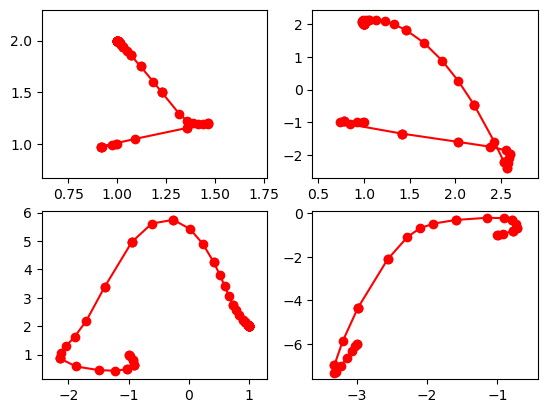

In [9]:
fig = plt.figure()
for k in range(len(qsols)):
    if(k == 0):
        axs = fig.add_subplot(221)
    elif(k == 1):
        axs = fig.add_subplot(222)
    elif(k == 2):
        axs = fig.add_subplot(223)
    elif(k == 3):
        axs = fig.add_subplot(224)
    startsol = qsols[k]
    initialize_double_solution(len(p),startsol)
    dictsol = strsol2dict(startsol)
    xpoints =  [dictsol['x']]
    ypoints =  [dictsol['y']]
    for k in range(300):
        ns = next_double_solution()
        dictsol = strsol2dict(ns)
        xpoints.append(dictsol['x'])
        ypoints.append(dictsol['y'])
        tval = dictsol['t'].real
        if(tval == 1.0):
            break
    print(ns)
    xre = [point.real for point in xpoints]
    yre = [point.real for point in ypoints]
    axs.set_xlim(min(xre)-0.3, max(xre)+0.3)
    axs.set_ylim(min(yre)-0.3, max(yre)+0.3)
    dots, = axs.plot(xre,yre,'r-')
    dots, = axs.plot(xre,yre,'ro')
    fig.canvas.draw()
fig.canvas.draw()
plt.savefig('showpathsfig1')

Typically, with an adaptive step size control, the points are closer to each other at the start and end of the paths, and where the paths turn.

The `trackers` module exports the original path trackers, which use *aposteriori step size control*.  An aposteriori step size control algorithm determines the step size based on the performance of the corrector.